# 2. 퍼셉트론을 이용한 분류

## MNIST 데이터셋 불러오기

In [119]:
import numpy as np
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [146]:
Num1 = 1    # 클래스1 숫자
Num2 = 7    # 클래스2 숫자

X = train_images.reshape(-1, 28*28) / 255   # 각 데이터 샘플을 행벡터로, 픽셀값을 [0, 1] 범위로 변환

X_set = X[train_labels == Num1]       # 클래스1 숫자만 뽑아옴
y_set = -1 * np.ones(X_set.shape[0])  # 클래스1 숫자의 정답은 -1로 표기

X_set = np.append(X_set, X[train_labels == Num2], axis=0)           # 클래스2 숫자를 추가
y_set = np.append(y_set, np.ones(X_set.shape[0] - y_set.shape[0]))  # 클래스2 숫자 정답은 +1로 표기

## ADALINE 구현하기

In [121]:
class AdalineGD(object):
   
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta        # 스텝사이즈(학습률, learing rate)
        self.n_iter = n_iter  # 가중치 업데이트 반복 회수
        self.random_state = random_state  # 난수 발생기 시드

    def net_input(self, X):   # 입력의 선형조합(z)을 출력
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):  # 활성화 함수
        return X              # 현재는 입력을 그대로 출력함

    def predict(self, X):     # 추론 함수. 입력 선형조합(z)->활성화함수->임계함수->최종 추론 출력
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)        

    def fit(self, X, y):
        # X : 학습 데이터
        # y : 정답값(레이블)

        rgen = np.random.RandomState(self.random_state)   # 난수 발생기 생성
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])   # 가중치 랜덤 초기화
        self.cost_ = []   # 반복에 따른 오차(비용)값 저장 변수

        for i in range(self.n_iter):  # 반복 학습(가중치 업데이트)
            net_input = self.net_input(X)       # 입력데이터의 선형조합(z)
            output = self.activation(net_input) # 활성화 함수 출력
            errors = (y - output)               # 정답과 차이 계산
            self.w_[1:] += self.eta * X.T.dot(errors) # 경사하강법으로 가중치 업데이트
            self.w_[0] += self.eta * errors.sum()     # x_0=1을 가정, 그에 맞게 w_0 업데이트
            cost = (errors**2).sum() / 2.0            # 오차함수값 계산
            self.cost_.append(cost)                   # 오차값 저장 변수에 현재 오차값 추가
        return self


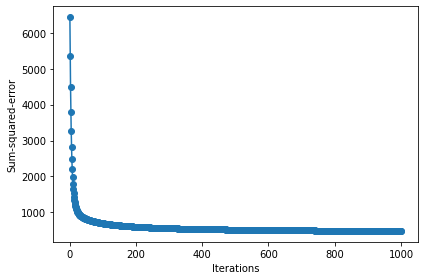

In [147]:
import matplotlib.pyplot as plt

ada = AdalineGD(n_iter=1000, eta=0.000001)
ada.fit(X_set, y_set)

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

In [148]:
X_test = test_images.reshape(-1, 28*28) / 255

X_set_test = X_test[test_labels == Num1]        # 클래스1 숫자만 뽑아옴
y_set_test = -1 * np.ones(X_set_test.shape[0])  # 클래스1 숫자의 정답을 -1로 표기

X_set_test = np.append(X_set_test, X_test[test_labels == Num2], axis=0)   # 클래스2 숫자를 추가
y_set_test = np.append(y_set_test, np.ones(X_set_test.shape[0] - y_set_test.shape[0]))  # 클래스2 숫자 정답을 +1로 표기

accuracy_cnt = sum(ada.predict(X_set_test) == y_set_test)         # 예측결과를 정답과 비교
print("Accuracy:" + str(float(accuracy_cnt) / len(X_set_test)))   # 예측 정확도 출력

Accuracy:0.9884419787332409


Label:  1
Prediction:  7


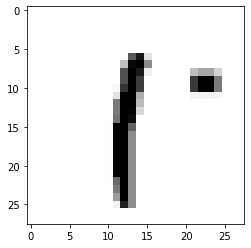

In [283]:
# 테스트셋 중에 임의로 하나를 선택
#r = np.random.randint(0, len(X_set_test) - 1)    
r = 645
X_single_data = X_set_test[r]
y_single_data = y_set_test[r]

print('Label: ', np.where(y_single_data == -1, Num1, Num2))
print('Prediction: ', np.where(ada.predict(X_single_data) == -1, Num1, Num2))

# 선택된 테스트 이미지 출력
plt.imshow(X_single_data.reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [281]:
np.where(ada.predict(X_set_test) != y_set_test)

(array([ 485,  645, 1187, 1237, 1252, 1259, 1261, 1264, 1268, 1285, 1312,
        1314, 1346, 1409, 1508, 1529, 1533, 1535, 1543, 1573, 1629, 1635,
        1642, 1747, 1889]),)